# Numerical 1-D FEM solution of the heat diffusion equation

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from scipy.sparse import csr_matrix
from scipy import sparse
from numpy import array
from scipy.sparse.linalg import spsolve
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
from tabulate import tabulate

First we define some numerical constants and define the problem

In [91]:
#constants
lx          = 10           #width
nnod        = 11            #number of nodes
nnodel      = 2            #nodes per element
k           = 1            #conductivity
Q           = 1            #source term
Tleft       = 0            #T boundary conditions
Trite       = 0

#numerics
nel         = nnod-1       #numnber of elements

Now we make our FEM mesh and element connectivity

In [92]:
Gcoord, dx  = np.linspace(0,lx,nnod,   retstep=True) #global coordinates
EL2NOD      = np.array([np.arange(0,nnod-1), np.arange(1,nnod)], dtype=int).T.copy()  # connectivity matrix

print(tabulate(EL2NOD, headers=['Element #', 'Node 1', 'Node 2'], showindex=True))

  Element #    Node 1    Node 2
-----------  --------  --------
          0         0         1
          1         1         2
          2         2         3
          3         3         4
          4         4         5
          5         5         6
          6         6         7
          7         7         8
          8         8         9
          9         9        10


Now we spell out our analytically-derived element stiffness matrix (see previous sections):

In [84]:
#Ael    = ???
#Rhs_el  = ???

In [104]:
# hide: the code in this cell is hidden by the author

Now we need to loop over all elements and assemble the global stiffness matrix

In [100]:
Rhs_all = np.zeros(nnod)

I = np.zeros((nel,nnodel*nnodel))
J = np.zeros((nel,nnodel*nnodel))
K = np.zeros((nel,nnodel*nnodel))

for iel in range(0,nel):
      
    I[iel,:]  =  (EL2NOD[iel,:]*np.ones((nnodel,1), dtype=int)).T.reshape(nnodel*nnodel)
    J[iel,:]  =  (EL2NOD[iel,:]*np.ones((nnodel,1), dtype=int)).reshape(nnodel*nnodel)
    K[iel,:]  =  Ael.reshape(nnodel*nnodel)
    
    Rhs_all[EL2NOD[iel,:]] += Rhs_el
    

A_all = sparse.csr_matrix((K.reshape(nel*nnodel*nnodel),(I.reshape(nel*nnodel*nnodel),J.reshape(nel*nnodel*nnodel))),shape=(nnod,nnod))


Now we apply the boundary conditions in the usual way and solve using a sparse solver!

In [101]:
#Apply boundary conditions
#A_all??
#A_all??
#A_all??
# A_all??
#Rhs_all[0] = ?
#Rhs_all[-1] = ?

In [102]:
# hide: the code in this cell is hidden by the author

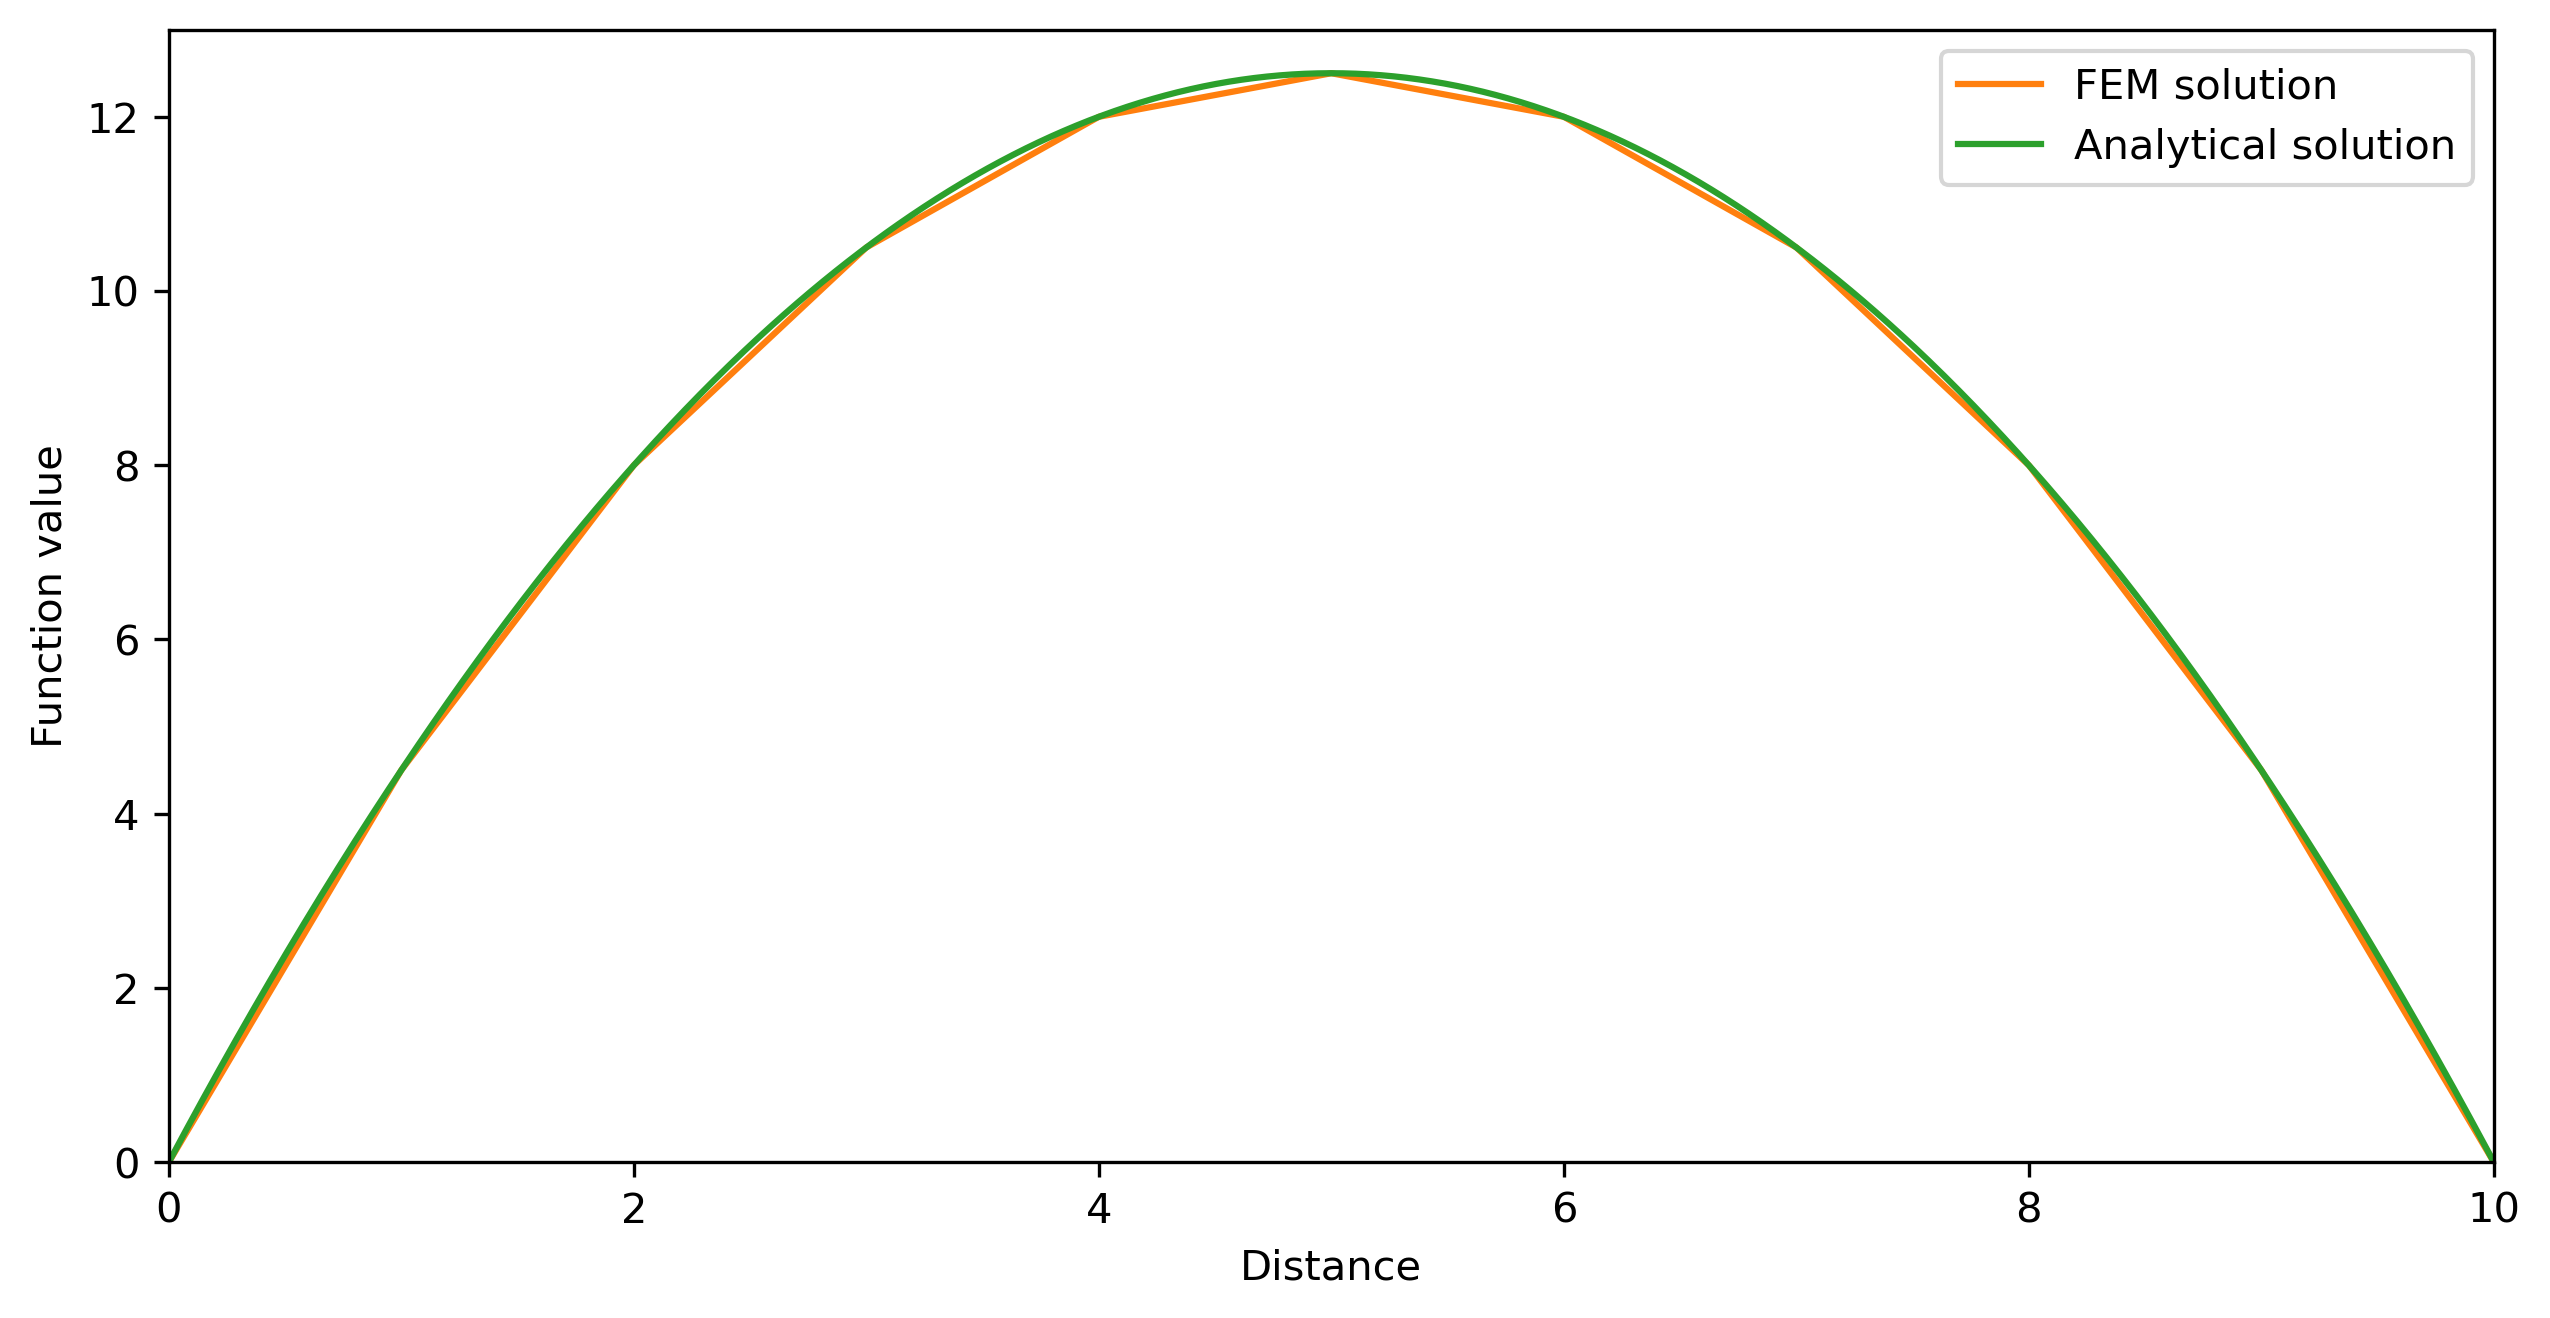

In [103]:
# and solve!

Tnew=spsolve(A_all,Rhs_all)

#Analytical solution
X     = np.linspace(0,lx, 100*nnod)
T_ana = -1/2*Q/k*np.square(X) + 1/2*Q/k*lx*X;

# Plotting
fig = plt.figure(figsize=(10,5))
fig.clf()
ax  = plt.axes(xlim=(0, lx), ylim=(0, 13))
line, = ax.plot([], [], lw=1)
ax.set_xlabel('Distance')
ax.set_ylabel('Function value')

plt.plot(Gcoord, Tnew, label='FEM solution')
plt.plot(X, T_ana, label='Analytical solution')
plt.legend()

